In [2]:
!wget http://cb.lk/covid_19


--2020-07-06 14:23:00--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-07-06 14:23:01--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-07-06 14:23:02--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-07-06 14:23:02--  https://www.dropbox.com/s/raw/7rjw

In [3]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [4]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [8]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [12]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 1.4952 - accuracy: 0.4961 - val_loss: 0.6827 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.6565 - accuracy: 0.6406 - val_loss: 0.6254 - val_accuracy: 0.8500
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.5464 - accuracy: 0.7305 - val_loss: 0.4011 - val_accuracy: 0.9667
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.3311 - accuracy: 0.8633 - val_loss: 0.2567 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.3745 - accuracy: 0.8281 - val_loss: 0.2396 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.2801 - accuracy: 0.8672 - val_loss: 0.2495 - val_accuracy: 0.9333
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.2767 - accuracy: 0.8984 - val_loss: 0.0780 - val_accuracy: 0.9833
Epoch 8/10
8/8 [========================

In [13]:
from keras.callbacks import ModelCheckpoint

In [14]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [15]:
history = model.fit_generator(train_generator,
                                   steps_per_epoch = 8,
                                   epochs = 10,
                                   callbacks=[checkpointer],
                                   validation_data = validation_generator,
                                   validation_steps = 2)

Epoch 1/10
8/8 [==============================] - 10s 1s/step - loss: 0.2027 - accuracy: 0.9297 - val_loss: 0.1128 - val_accuracy: 0.9833
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


8/8 [==============================] - 9s 1s/step - loss: 0.1702 - accuracy: 0.9336 - val_loss: 0.0899 - val_accuracy: 0.9833
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.1571 - accuracy: 0.9570 - val_loss: 0.1668 - val_accuracy: 0.9667
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.1360 - accuracy: 0.9531 - val_loss: 0.0694 - val_accuracy: 0.9833
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.0825 - accuracy: 0.9648 - val_loss: 0.0162 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.1107 - accuracy: 0.9531 - val_loss: 0.2090 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.1893 - accuracy: 0.9336 - val_loss: 0.0977 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==============================] - 9s 1s/step - loss: 0.2647 - accuracy: 0.8828 - val_loss: 0.1354 - val_accuracy: 0.9667
Epoch 9/10
8/8 [==============================] - 8s

Loss and Accuracy

In [16]:
model.save("model_adv.h5")

In [17]:
model.evaluate_generator(train_generator)

[0.18115174770355225, 0.96875]

In [18]:
model.evaluate_generator(validation_generator)

[0.03485633432865143, 0.9666666388511658]

Image Testing

In [19]:
model = load_model('model_adv.h5')

In [20]:
model.load_weights('model_adv.h5')

In [21]:
model.save('model_adv.h5')

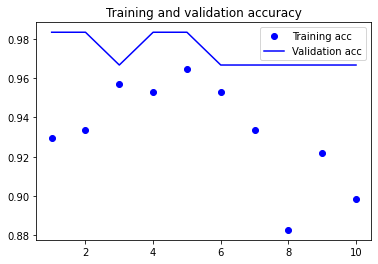

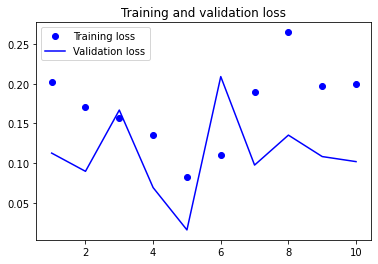

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
import os

In [24]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [25]:
y_actual = []
y_test = []

In [26]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [27]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [28]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
cm = confusion_matrix(y_actual, y_test)

In [31]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


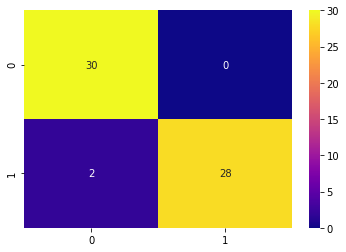

In [32]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [33]:
print ("{0}".format(classification_report(y_actual, y_test, labels=[0, 1])))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.93      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

